## Decision Trees.

Material from Udacity's Self Driving Cars Nanodegree, Term 1, Lesson 16: Decision Trees

In [2]:
from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

In [3]:
# Get some sample data
features_train, labels_train, features_test, labels_test = makeTerrainData()

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree
clf2 = DecisionTreeClassifier(min_samples_split=2)  # default is min_samples_split=2
clf50 = DecisionTreeClassifier(min_samples_split=50)

# Train the Decision Tree
clf2.fit(features_train, labels_train)
clf50.fit(features_train, labels_train)

# Make predictions
# pred2 = clf2.predict(features_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [16]:
from sklearn.metrics import accuracy_score

# Calculate accuracy of predictions
# acc = accuracy_score(pred2, labels_test)
acc2 = clf2.score(features_test, labels_test)
acc50 = clf50.score(features_test, labels_test)

print("Accuracy for decision tree with min_samples_split=2 : ", acc2)
print("Accuracy for decision tree with min_samples_split=50: ", acc50)

Accuracy for decision tree with min_samples_split=2 :  0.908
Accuracy for decision tree with min_samples_split=50:  0.912


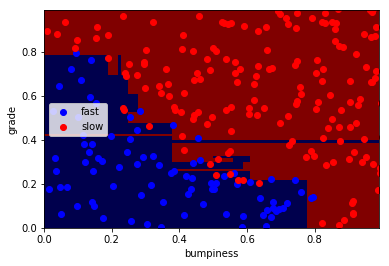

In [18]:
%matplotlib inline

# Print the decision boundary
prettyPicture(clf2, features_test, labels_test)

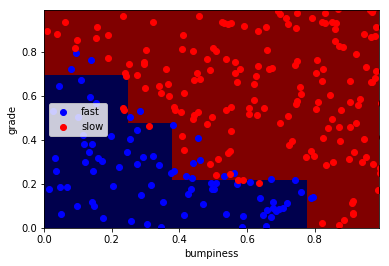

In [19]:
%matplotlib inline

# Print the decision boundary
prettyPicture(clf50, features_test, labels_test)

### Entropy
Controls how a Decision Tree decides where to split the data.

*Def.* Measure of **impurity** in a bunch of examples.

Formula:
entropy = sum_i(-p_i * log_2(p_i))

where p_i = fraction of examples in class i; so the sum is over all classes i.

**Examples**
- all examples are same class => entropy = 0
- examples are evenly split between classes => entropy = 1

### Information Gain
Defined as:
entropy(parent) - [weighted average] of the entropy(children)

The Decision Tree Algorithm will **maximize the information gain**.

### Tuning Criterion Parameter
This is the parameter that the Decision Tree is basing its splits. By default, this is *gini*, but you could change it to *entropy* for example.

### Bias-Variance Dilemma
High bias algorithm - basically ignores the data
High variance algorithm - can only replicate results on data that it already seen; does not have enough bias to generalize to new data

**Ideally** you want to be in the middle of bias and variance.

### Decision Trees Strenghts and Weaknesses
#### Positives
* easy to use, allow you to graphically interpret the data
* build bigger classifiers out of DTs
    * ansamble methods - building a classifier out of a classifier

#### Negatives
* they are prone to overfitting - especially if the data has lots of features, and a complicated DT therefore
    * tune parameters in order to avoid this
    * stop the growth of the tree at the appropriate time